In [ ]:
 import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data= pd.read_csv("MTL_KAN_train_2.csv")


In [ ]:
data.head(10)

,Unnamed: 0,translated,comment,sent,off
0,5533,ನಿಂಗಾಪ್ಪ ಹಟಗನ್ವಾರ್ ಅತ್ಯುತ್ತಮ ಮಾರ್ಗವೆಂದರೆ 4Uíyk...,ningappa hutagannavar the best way is 4uíykhfj...,unknown,Offensive_Untargetede
1,4490,ಸೂಪರ್ ಹಾಡಿತು ಗುರು,Super sang guru,Positive,Not_offensive
2,6216,ಕೀಳು ಕಾಡಿಯೂ,ಕೇಳಿ ಕಾದಿರುವ ಬಾಂಧವರೇnಭುವಿಯಲ್ಲಿ ಅವನ ಅರಿತವರೆnಯಾರ...,Positive,Offensive_Targeted_Insult_Individual
3,3196,ನಾನ್ ಅಸ್ಥಾಪಿಸು madhe,Nan uninstall madhe,Positive,Not_offensive
4,6064,ಪುಟ್ ದಿನ,ಎಷ್ಟು ದಿನ ಆಯಿತು ಕೇಳಿ ಓ ತುಂಬಾ ಖುಷಿ ಆಯಿತು,Positive,Not_offensive
5,2386,ಹೌದಾ ಮೂವೀ ಆಡ್ಬುಟಾ ..... Tumba ಚೆನ್ನೇಜಿಡ್ ........,Howdu movie Adbhuta..... tumba chennagide........,Negative,Offensive_Targeted_Insult_Group
6,5898,ಇದು ಆರಿಟ್ರೆ ಸಟಿಸೊನಾತ್ಮಕವಾಗಿ ....,ಇದು ಚರಿತ್ರೆ ಸೃಷ್ಟಿಸೋ ಅವತಾರ....,Positive,Not_offensive
7,209,@BAD ಬಾಯ್ ಯಪ್ಪ ಮೊಡ್ಲು ಆರ್ಟಾ ಹಿಂದೆ ತಾರಾ ಟೈಪ್ ಮಾಧು,@BAD BOY yappa Modlu Arta ago Tara type maadu,Negative,Offensive_Untargetede
8,4011,ಸರ್ ನಿಮ್ಮಾ ಥಂಬ್ನೇಲ್ ಸಾರಿ ಇಲ್ನಾನ್ನಾನು ಇಇ ಚಲನಚಿತ...,Sir nimma thumbnail sari illanNaanu ee film no...,Mixed,Offensive_Targeted_Insult_Individual
9,2872,Loo nim makha muccha e yoice gu ಇಷ್ಟವಿಲ್ಲ,Loo Nim Makha muccha e Video gu Dislike yenro ...,Negative,Offensive_Targeted_Insult_Other


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265 entries, 0 to 4264
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4265 non-null   int64 
 1   translated  4265 non-null   object
 2   comment     4265 non-null   object
 3   sent        4265 non-null   object
 4   off         4265 non-null   object
dtypes: int64(1), object(4)
memory usage: 166.7+ KB


In [ ]:
data.describe()

,Unnamed: 0
count,4265.000000
mean,3824.884174
std,2194.466623
min,1.000000
25%,1836.000000
50%,3824.000000
75%,5925.000000
max,7271.000000


In [ ]:
data['comment'].describe()

count                                                  4265
unique                                                 4265
top       ningappa hutagannavar the best way is 4uíykhfj...
freq                                                      1
Name: comment, dtype: object

In [ ]:
data['sent'].describe()

count         4265
unique           4
top       Positive
freq          2354
Name: sent, dtype: object

In [ ]:
data['off'].describe()

count              4265
unique                5
top       Not_offensive
freq               3113
Name: off, dtype: object

categorical analysis and visualization

In [ ]:
data['sent'].value_counts()

Positive    2354
Negative    1133
Mixed        446
unknown      332
Name: sent, dtype: int64

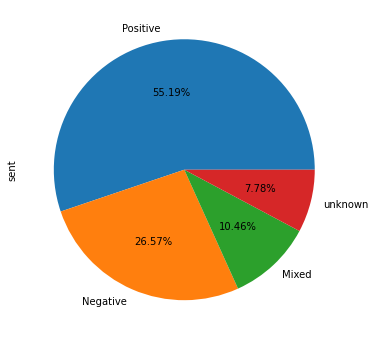

In [ ]:
data['sent'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.2f%%')

In [ ]:
data['off'].value_counts()

Not_offensive                           3113
Offensive_Targeted_Insult_Individual     482
Offensive_Targeted_Insult_Group          332
Offensive_Untargetede                    218
Offensive_Targeted_Insult_Other          120
Name: off, dtype: int64

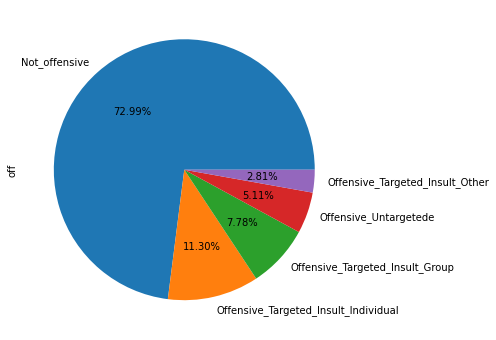

In [ ]:
data['off'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.2f%%')

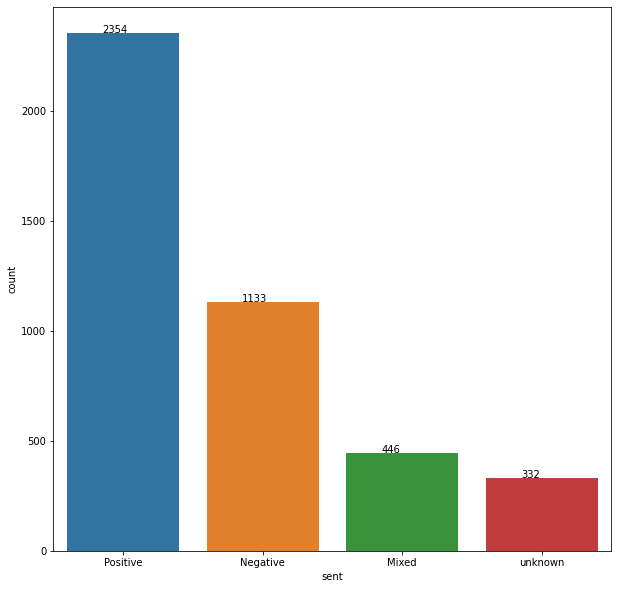

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x=data['sent'],order=data['sent'].value_counts().index)
for p ,label in zip(ax.patches , data['sent'].value_counts()):
  ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

# ax= data['sent'].value_counts().plot(kind='bar', figsize=(14,6))
# ax.set_ylabel('Number')

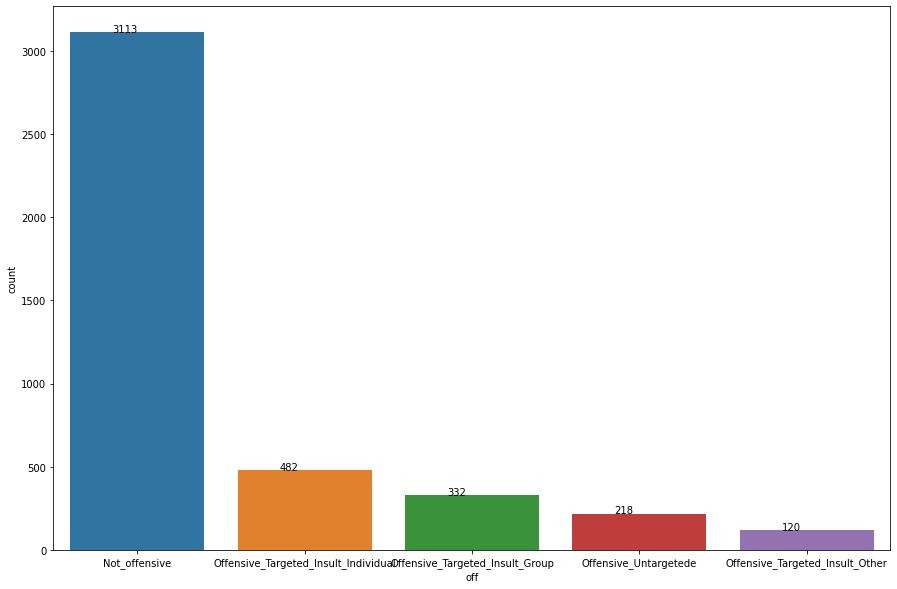

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x=data['off'],order=data['off'].value_counts().index)
for p ,label in zip(ax.patches , data['off'].value_counts()):
  ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))
# ax= data['off'].value_counts().plot(kind='bar', figsize=(14,6))
# ax.set_ylabel('Number')

In [ ]:

data.shape

(4265, 5)

Checking null and duplicate values if any


In [ ]:
print(data.shape)
print(data.isnull().values.any())
data.dropna(axis=0,inplace=True)
print(data.shape)
#no null values

(4265, 5)
False
(4265, 5)


In [ ]:
data.drop_duplicates(subset=['comment','sent','off'],keep='first',inplace=True)
print(data.shape)
#no duplicates

(4265, 5)


Stemming

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import pandas as pd

In [ ]:
!pip install spacy 

In [ ]:
train= pd.read_csv("MTL_KAN_train_2.csv")
train


,Unnamed: 0,translated,comment,sent,off
0,5533,ನಿಂಗಾಪ್ಪ ಹಟಗನ್ವಾರ್ ಅತ್ಯುತ್ತಮ ಮಾರ್ಗವೆಂದರೆ 4Uíyk...,ningappa hutagannavar the best way is 4uíykhfj...,unknown,Offensive_Untargetede
1,4490,ಸೂಪರ್ ಹಾಡಿತು ಗುರು,Super sang guru,Positive,Not_offensive
2,6216,ಕೀಳು ಕಾಡಿಯೂ,ಕೇಳಿ ಕಾದಿರುವ ಬಾಂಧವರೇnಭುವಿಯಲ್ಲಿ ಅವನ ಅರಿತವರೆnಯಾರ...,Positive,Offensive_Targeted_Insult_Individual
3,3196,ನಾನ್ ಅಸ್ಥಾಪಿಸು madhe,Nan uninstall madhe,Positive,Not_offensive
4,6064,ಪುಟ್ ದಿನ,ಎಷ್ಟು ದಿನ ಆಯಿತು ಕೇಳಿ ಓ ತುಂಬಾ ಖುಷಿ ಆಯಿತು,Positive,Not_offensive
...,...,...,...,...,...
4260,4468,ಸೂಪರ್ ಒಸಾಮ್ ಸಂಗೀತ,Super osam music,Positive,Not_offensive
4261,5645,ಸೂಪರ್ ಟೋಗಾರಿ ಟಿಪ್ಪಿ,super toogari tipppa,Positive,Not_offensive
4262,7118,ಬುರ್ಗುರ್ ಗುರು,ಸೂಪರ್ ಗುರು ಲಾಸ್ಟ್ ಅಲ್ಲಿ ಹೇಳಿದ್ರಲ್ಲ ತಿಕ ಹೊಡಿಯೋ ...,Mixed,Not_offensive
4263,7153,ಸಸ್ಪೆರ್ ಸಾಂಗ್ ಶುಭಭರಣ,ಸೂಪರ್ ಸಾಂಗ್ ಹುಚ್ಚೆಬ್ಬಿಸುವ ಸಾಂಗ್,Positive,Not_offensive


In [ ]:
from spacy.lang.kn import Kannada


In [ ]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 1.3 MB 60.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=1cac7780911edcb16387cfe554a83d1136a49ac1c550922c44d38731b83c93ae
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator
trans=Translator()

In [ ]:
out=trans.translate("ಎಷ್ಟು ದಿನ ಆಯಿತು ಕೇಳಿ ಓ ತುಂಬಾ ಖುಷಿ ಆಯಿತು",dest="en")

In [ ]:
print(out.text)

Oh how happy the day was


In [ ]:
out=trans.translate("Nan uninstall madhe	",dest="kn")

In [ ]:
print(out.text)

ನಾನ್ ಅನ್‌ಇನ್‌ಸ್ಟಾಲ್ ಅದ್ಭುತವಾಗಿದೆ


In [ ]:
out=trans.translate("ನಾನ್ ಅನ್‌ಇನ್‌ಸ್ಟಾಲ್ ಅದ್ಭುತವಾಗಿದೆ	",dest="en")

In [ ]:
print(out.text)

Noninstall is great


In [ ]:
!pip install translate

In [ ]:
from translate import Translator

In [ ]:
translator= Translator(to_lang="kannada")
translation = translator.translate("Nan uninstall madhe")

In [ ]:
print(translation)

ನಾನ್ ಅನ್ ಇನ್ಸ್ಟಾಲ್ ಮಾಡ್ದೆ


In [ ]:
out=trans.translate("ನಾನ್ ಅಸ್ಥಾಪನೆ ಮಾಧೆ",dest="en")

In [ ]:
print(out.text)

Non-uninstalling Madha


In [ ]:
out=trans.translate("Hello how are you	",dest="kn")

In [ ]:
print(out.text)

ಹಲೋ ಹೇಗಿದ್ದೀಯ


In [ ]:
out=trans.translate("ಹಲೋ ಹೇಗಿದ್ದೀಯ	",dest="en")

In [ ]:
print(out.text)

Hello how are you


In [ ]:
out=trans.translate("An independent clause can stand alone as a sentence. It contains a subject and a verb and is a complete idea.	",dest="kn")

In [ ]:
print(out.text)

ಸ್ವತಂತ್ರ ಷರತ್ತು ವಾಕ್ಯವಾಗಿ ಏಕಾಂಗಿಯಾಗಿ ನಿಲ್ಲಬಹುದು. ಇದು ವಿಷಯ ಮತ್ತು ಕ್ರಿಯಾಪದವನ್ನು ಒಳಗೊಂಡಿದೆ ಮತ್ತು ಇದು ಸಂಪೂರ್ಣ ಕಲ್ಪನೆಯಾಗಿದೆ.


In [ ]:
out=trans.translate("ಸ್ವತಂತ್ರ ಷರತ್ತು ವಾಕ್ಯವಾಗಿ ಏಕಾಂಗಿಯಾಗಿ ನಿಲ್ಲಬಹುದು. ಇದು ವಿಷಯ ಮತ್ತು ಕ್ರಿಯಾಪದವನ್ನು ಒಳಗೊಂಡಿದೆ ಮತ್ತು ಇದು ಸಂಪೂರ್ಣ ಕಲ್ಪನೆಯಾಗಿದೆ.",dest="en")

In [ ]:
print(out.text)

The independent clause can stand alone as a sentence. It contains the subject and the verb and is the whole idea.


In [ ]:
out=trans.translate("Yen Guru Yen Samachar?",dest="en")

In [ ]:
print(out.text)

Yen Guru Yen Samachar?


In [ ]:
from translate import Translator
translator= Translator(from_lang="kannada",to_lang="english")
translation = translator.translate("Yen Guru Yen Samachar?")
print (translation)

Yen Guru Yen Samachar?


In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 30.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=4c84790840c61c35e1dfbfffb771d4a91d416f3e0990123862b9f0a33db84776
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
# print(detect(""))

In [ ]:
print(detect("I have uninstalled it ಒಳ್ಳೆಯದಾಗಲಿ"))


no


In [ ]:
print(detect("Nan uninstall madhe	"))

en


In [ ]:
print(detect("Eevu Inglish Mathanadutthira"))

en


In [ ]:
print(detect("Namaskara"))

id


In [ ]:
out=trans.translate("	ningappa hutagannavar the best way is 4uíykhfjklbgkkñ ",dest="en") 

In [ ]:
print(out.text)

ningappa hutagannavar the best way is 4uíykhfjklbgkkñ


In [ ]:
translator= Translator(to_lang="kannada")
translation = translator.translate(" 	ningappa hutagannavar the best way is 4uíykhfjklbgkkñ  ")

In [ ]:
print(translation)

ningappa hutagannavar ಉತ್ತಮ ಮಾರ್ಗ 4uíykhfjklbgkkñ


In [ ]:
out=trans.translate("ಕೇಳಿ ಕಾದಿರುವ ಬಾಂಧವರೇnಭುವಿಯಲ್ಲಿ ಅವನ ಅರಿತವರೆnಯಾರಿಲ್ಲ ಬಿಡಿ ",dest="en") 

In [ ]:
print(out.text)

Bandhavare n bhuvarwa waiting to hear his friends


In [ ]:
x=data.iloc[:,1].values

In [ ]:
idx=0;
for i in x:
  out=trans.translate(i,dest="en")
  print(out.text)
  # x[idx]=out.text
  # print(x[idx])
  # idx=idx+1

4Uíykhfjklbgkkin is the best way to Ningappa Hutaganwar
Super sung guru
Inferior
Uninstall madhe
Put day
Howda Movie Adbutta ..... Tumba Chennegid ..... But Swalpa Confused Ansatte Ends ..... Adi And Diya Ondagiddre Innu ChennaGirtittu ..... Elru Tumba Chennag Act Madidare
This is Aritre satisanically….
Tara type Madhu behind @BAD Boy Yappa Modlu Arta
Sir Nimba Thumbnail Sari Illannanu EE Movie Maditittini Audrey Bangalore Lula Cade 10 Try
Loo nim don't like makha muccha e yoice gu
@ @ goodbye.
2020 blockbuster hit movie. Jai Karnataka
Super guru ninu love you
Just D Boss OK JAI Kannada All Movies Hmmm KotiGobba Leave Hehehe
Super Bro I Tick Talked Audrey Adenu Nam Desh Kentluu Heckenalla Nam Desh Beku Adke Ila Chesh Applications Install Maddini
Dislike the Super Agide Song Mathra N940 and still counting
@Ambrish Mallad Lukka Fans Nimma Lukka Sudeppi Picture Look Ella Flap Augmented Side Actor Fit Bats Age Ed Dane Balegara Properly Tind Baris Hell Bats ®
Movie Yawaga Boss
Tell Teacher 

In [ ]:
  # print(type(i))
  # out=trans.translate(i,dest="en")
  # print(out.text)

In [ ]:
from googletrans import Translator
trans=Translator()